In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from datetime import datetime
import pandas_datareader.data as web

In [3]:
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

In [4]:
year = datetime.today().year
month = datetime.today().month
day = datetime.today().day
end = "%s-%s-%s" %(year-1,month,day)
start = "%s-%s-%s" %(year-2,month,day)

In [5]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, 'quandl', start, end, access_key="2R89GBx5133ux-s5Gmad")

<h1> Basic Analysis of Apple Stock </h1>

In [6]:
AAPL.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-20,175.24,176.80,174.94,175.240,19314039.0,0.0,1.0,175.24,176.80,174.94,175.240,19314039.0


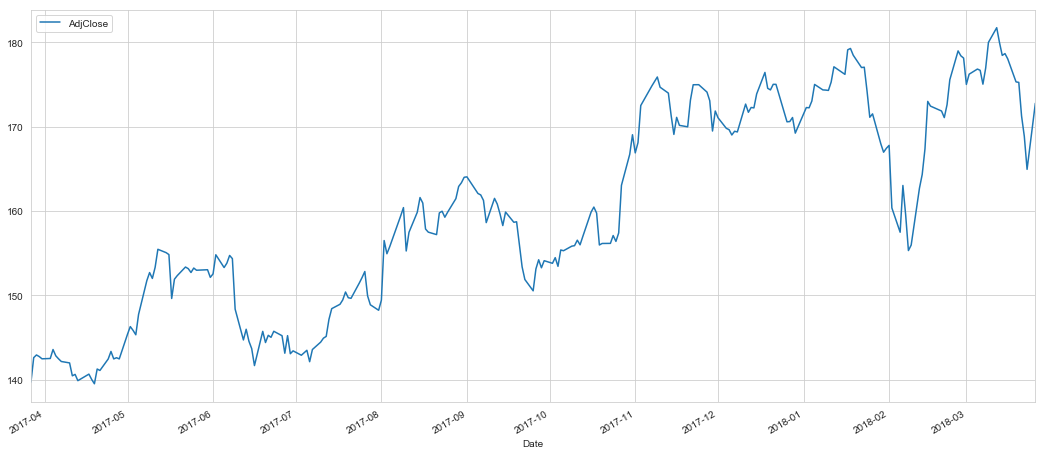

In [7]:
AAPL['AdjClose'].plot(legend=True, figsize=(18,8))

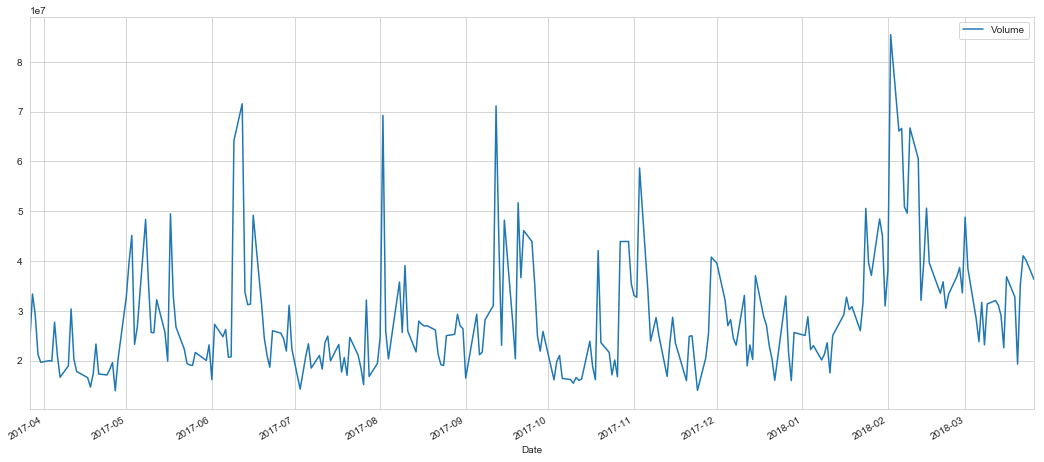

In [8]:
AAPL['Volume'].plot(legend=True, figsize=(18,8))

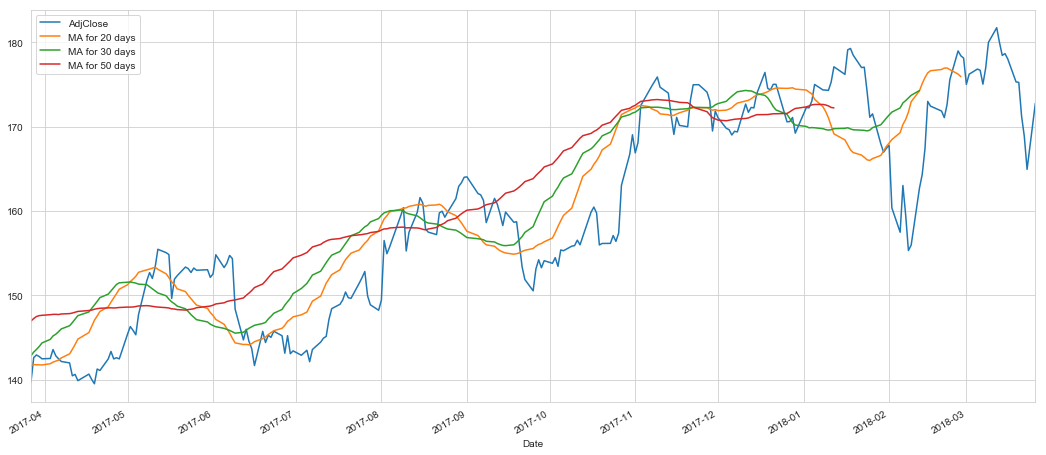

In [9]:
# MA stands for moving average
MA_day = [20,30,50]
for MA in MA_day:
    column_name = "MA for %s days" %(str(MA))
    AAPL[column_name] = AAPL['AdjClose'].rolling(MA).mean()

AAPL[['AdjClose', 'MA for 20 days', 'MA for 30 days', 'MA for 50 days']].plot(legend=True, figsize=(18,8))

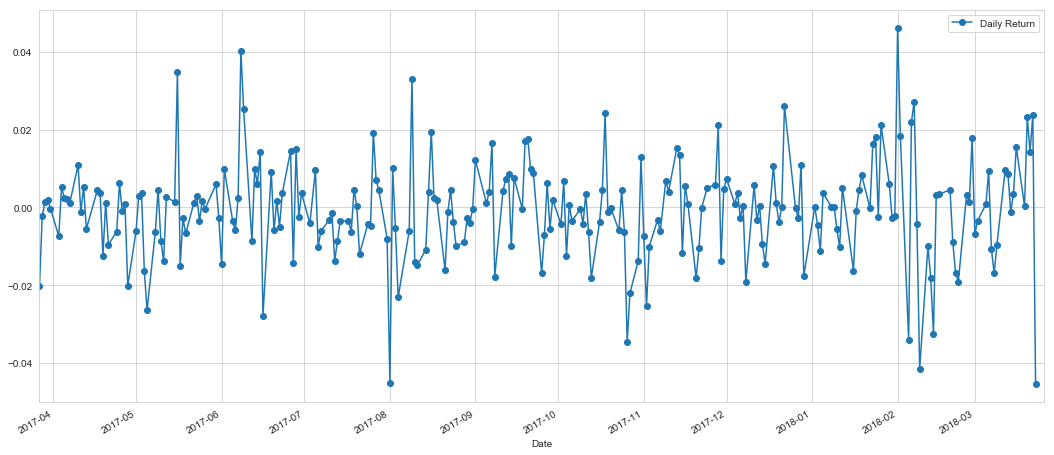

In [10]:
AAPL['Daily Return'] = AAPL['AdjClose'].pct_change()
AAPL['Daily Return'].plot(legend=True, figsize=(18,8), marker='o')

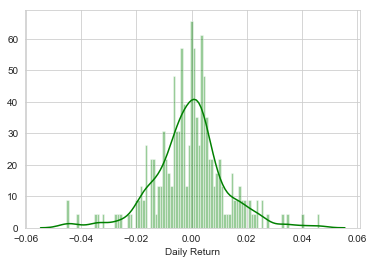

In [11]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='green')

In [12]:
closing_df = pd.DataFrame(list([AAPL['AdjClose'],GOOGL['AdjClose'],MSFT['AdjClose'],AMZN['AdjClose']])).T
closing_df.columns = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

In [13]:
# calculate daily percentage return
tech_rets = closing_df.pct_change()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


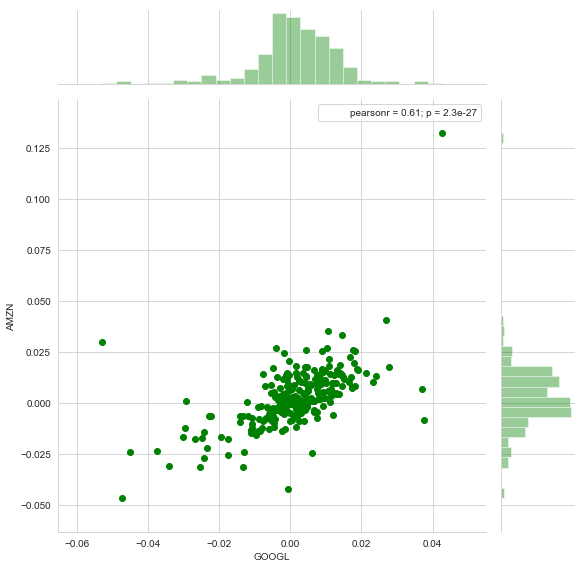

In [14]:
g = sns.JointGrid(x='GOOGL',y='AMZN', data=tech_rets, size=8)
g = g.plot_joint(plt.scatter, color = 'green')
g = g.plot_marginals(sns.distplot, kde=False, color="green")
g.annotate(stats.pearsonr)

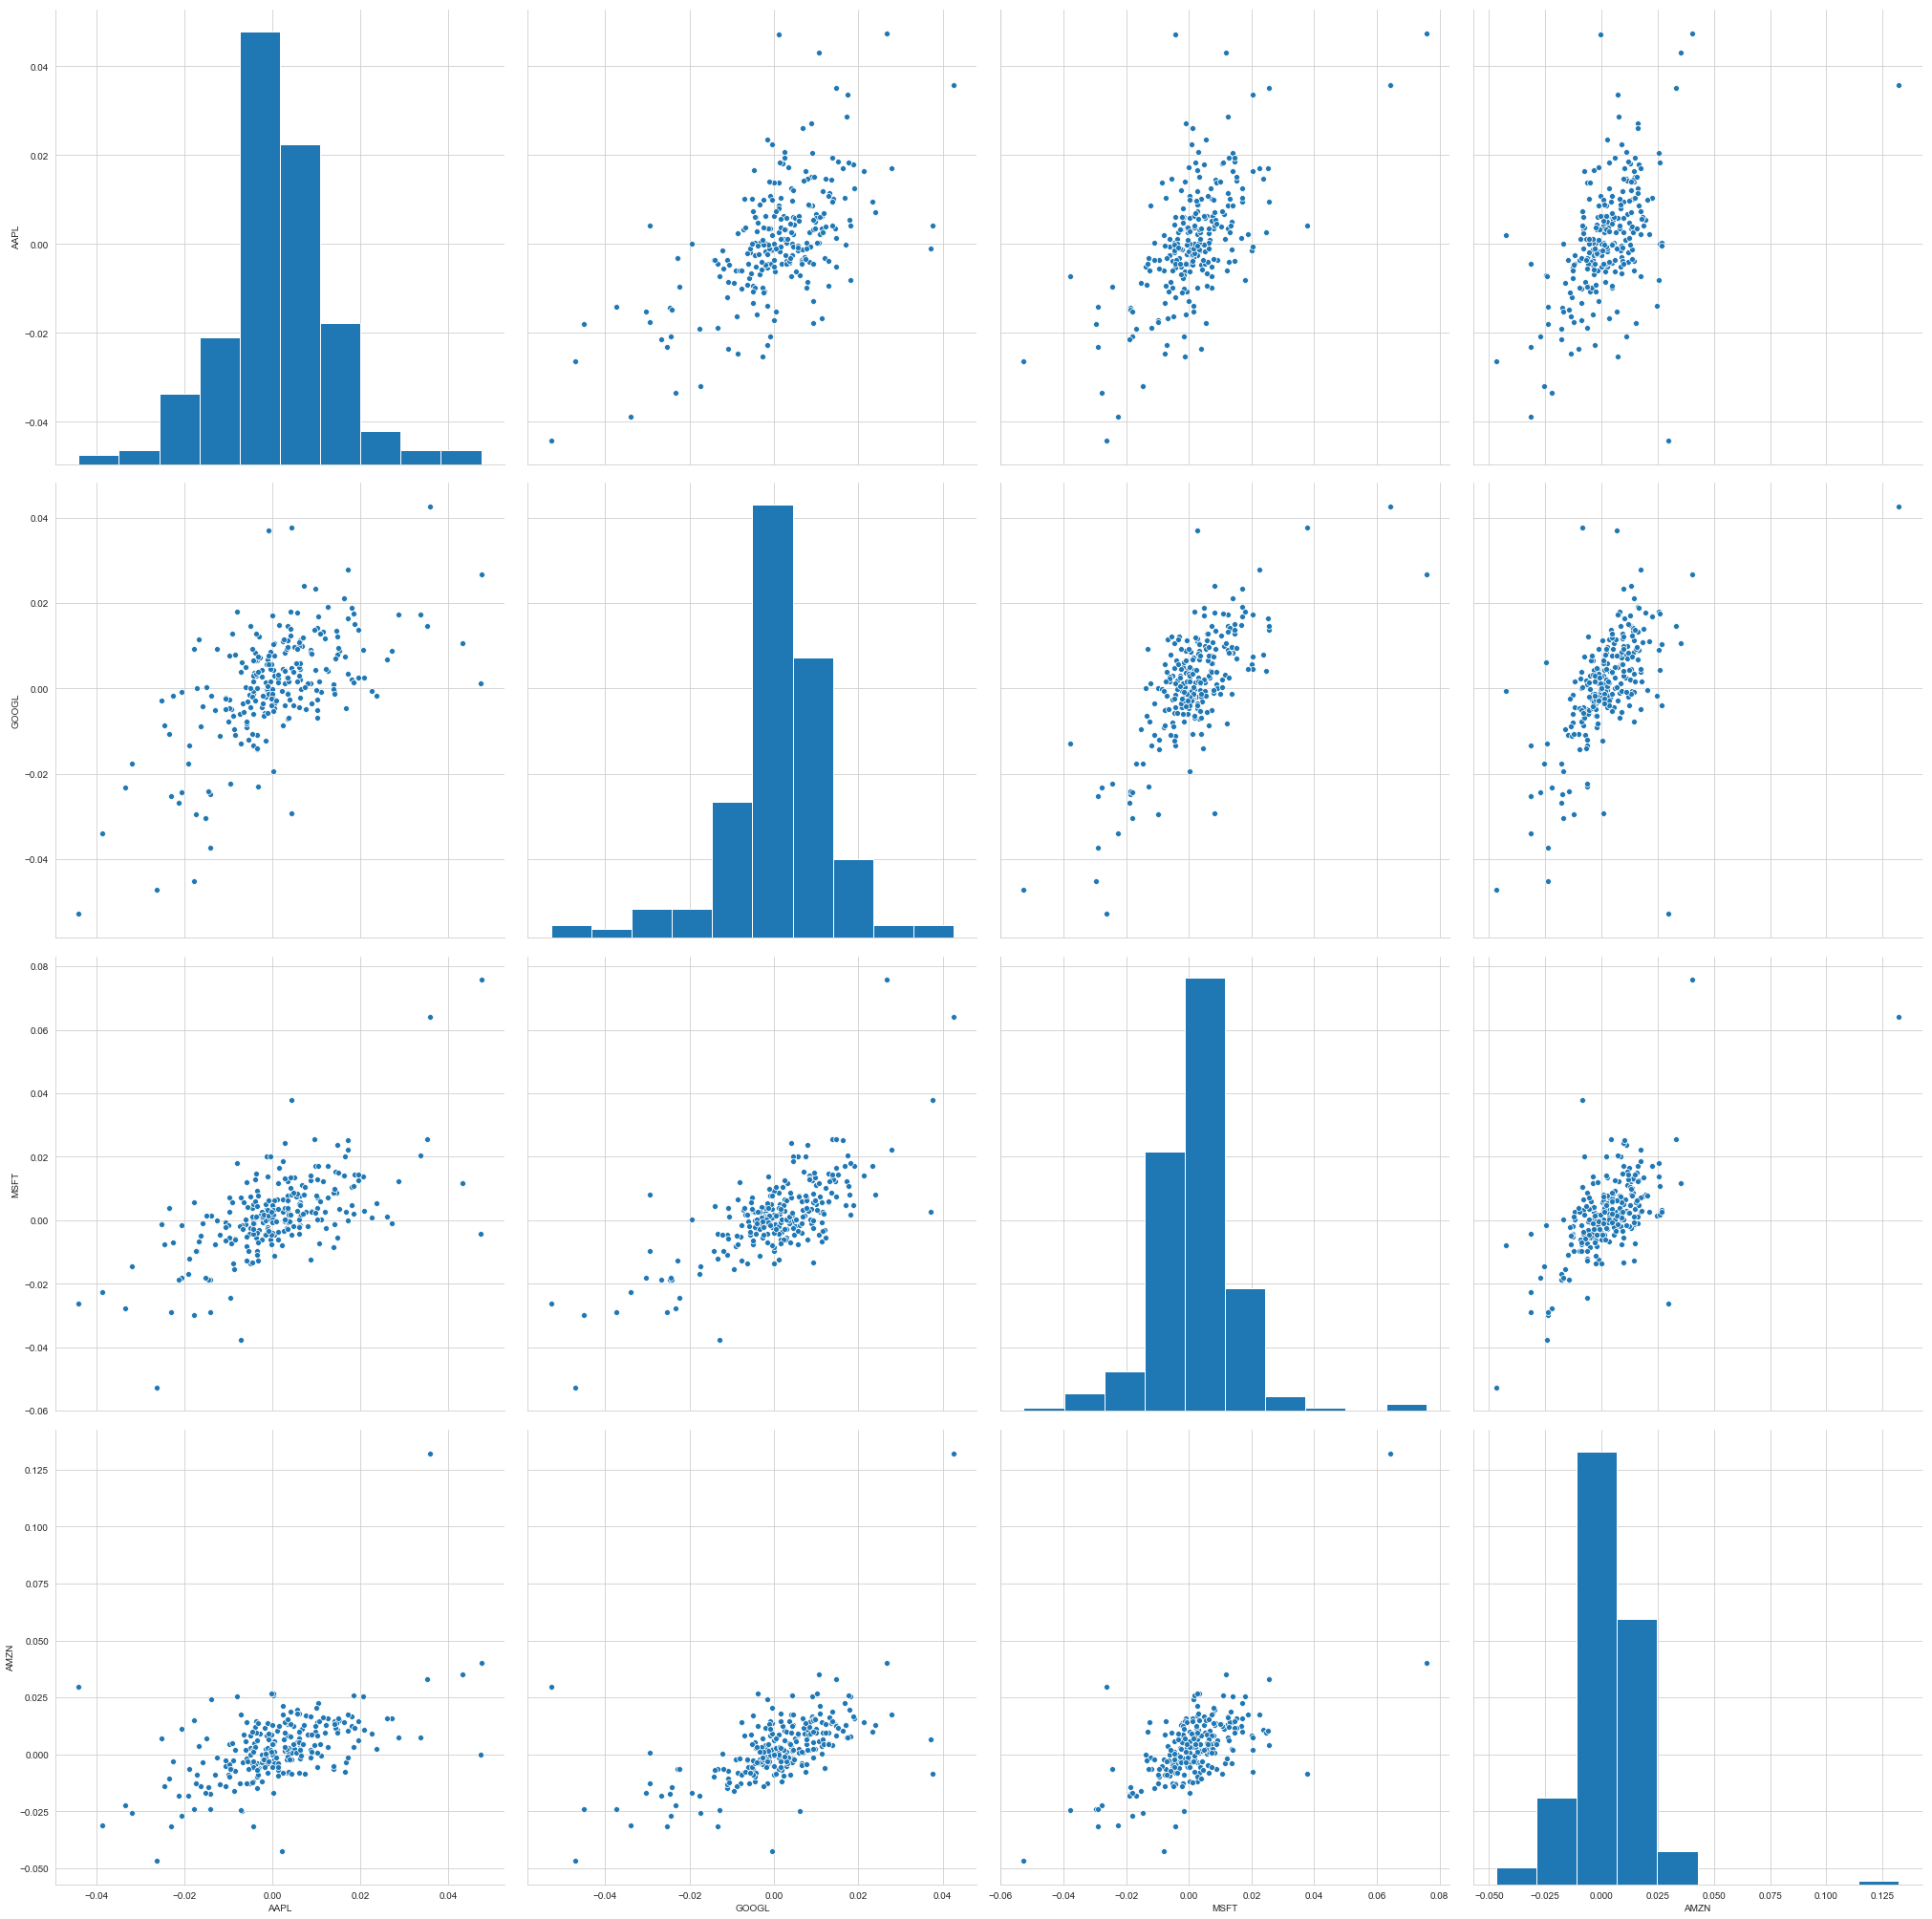

In [15]:
f = sns.pairplot(data=tech_rets.dropna(), height=7)

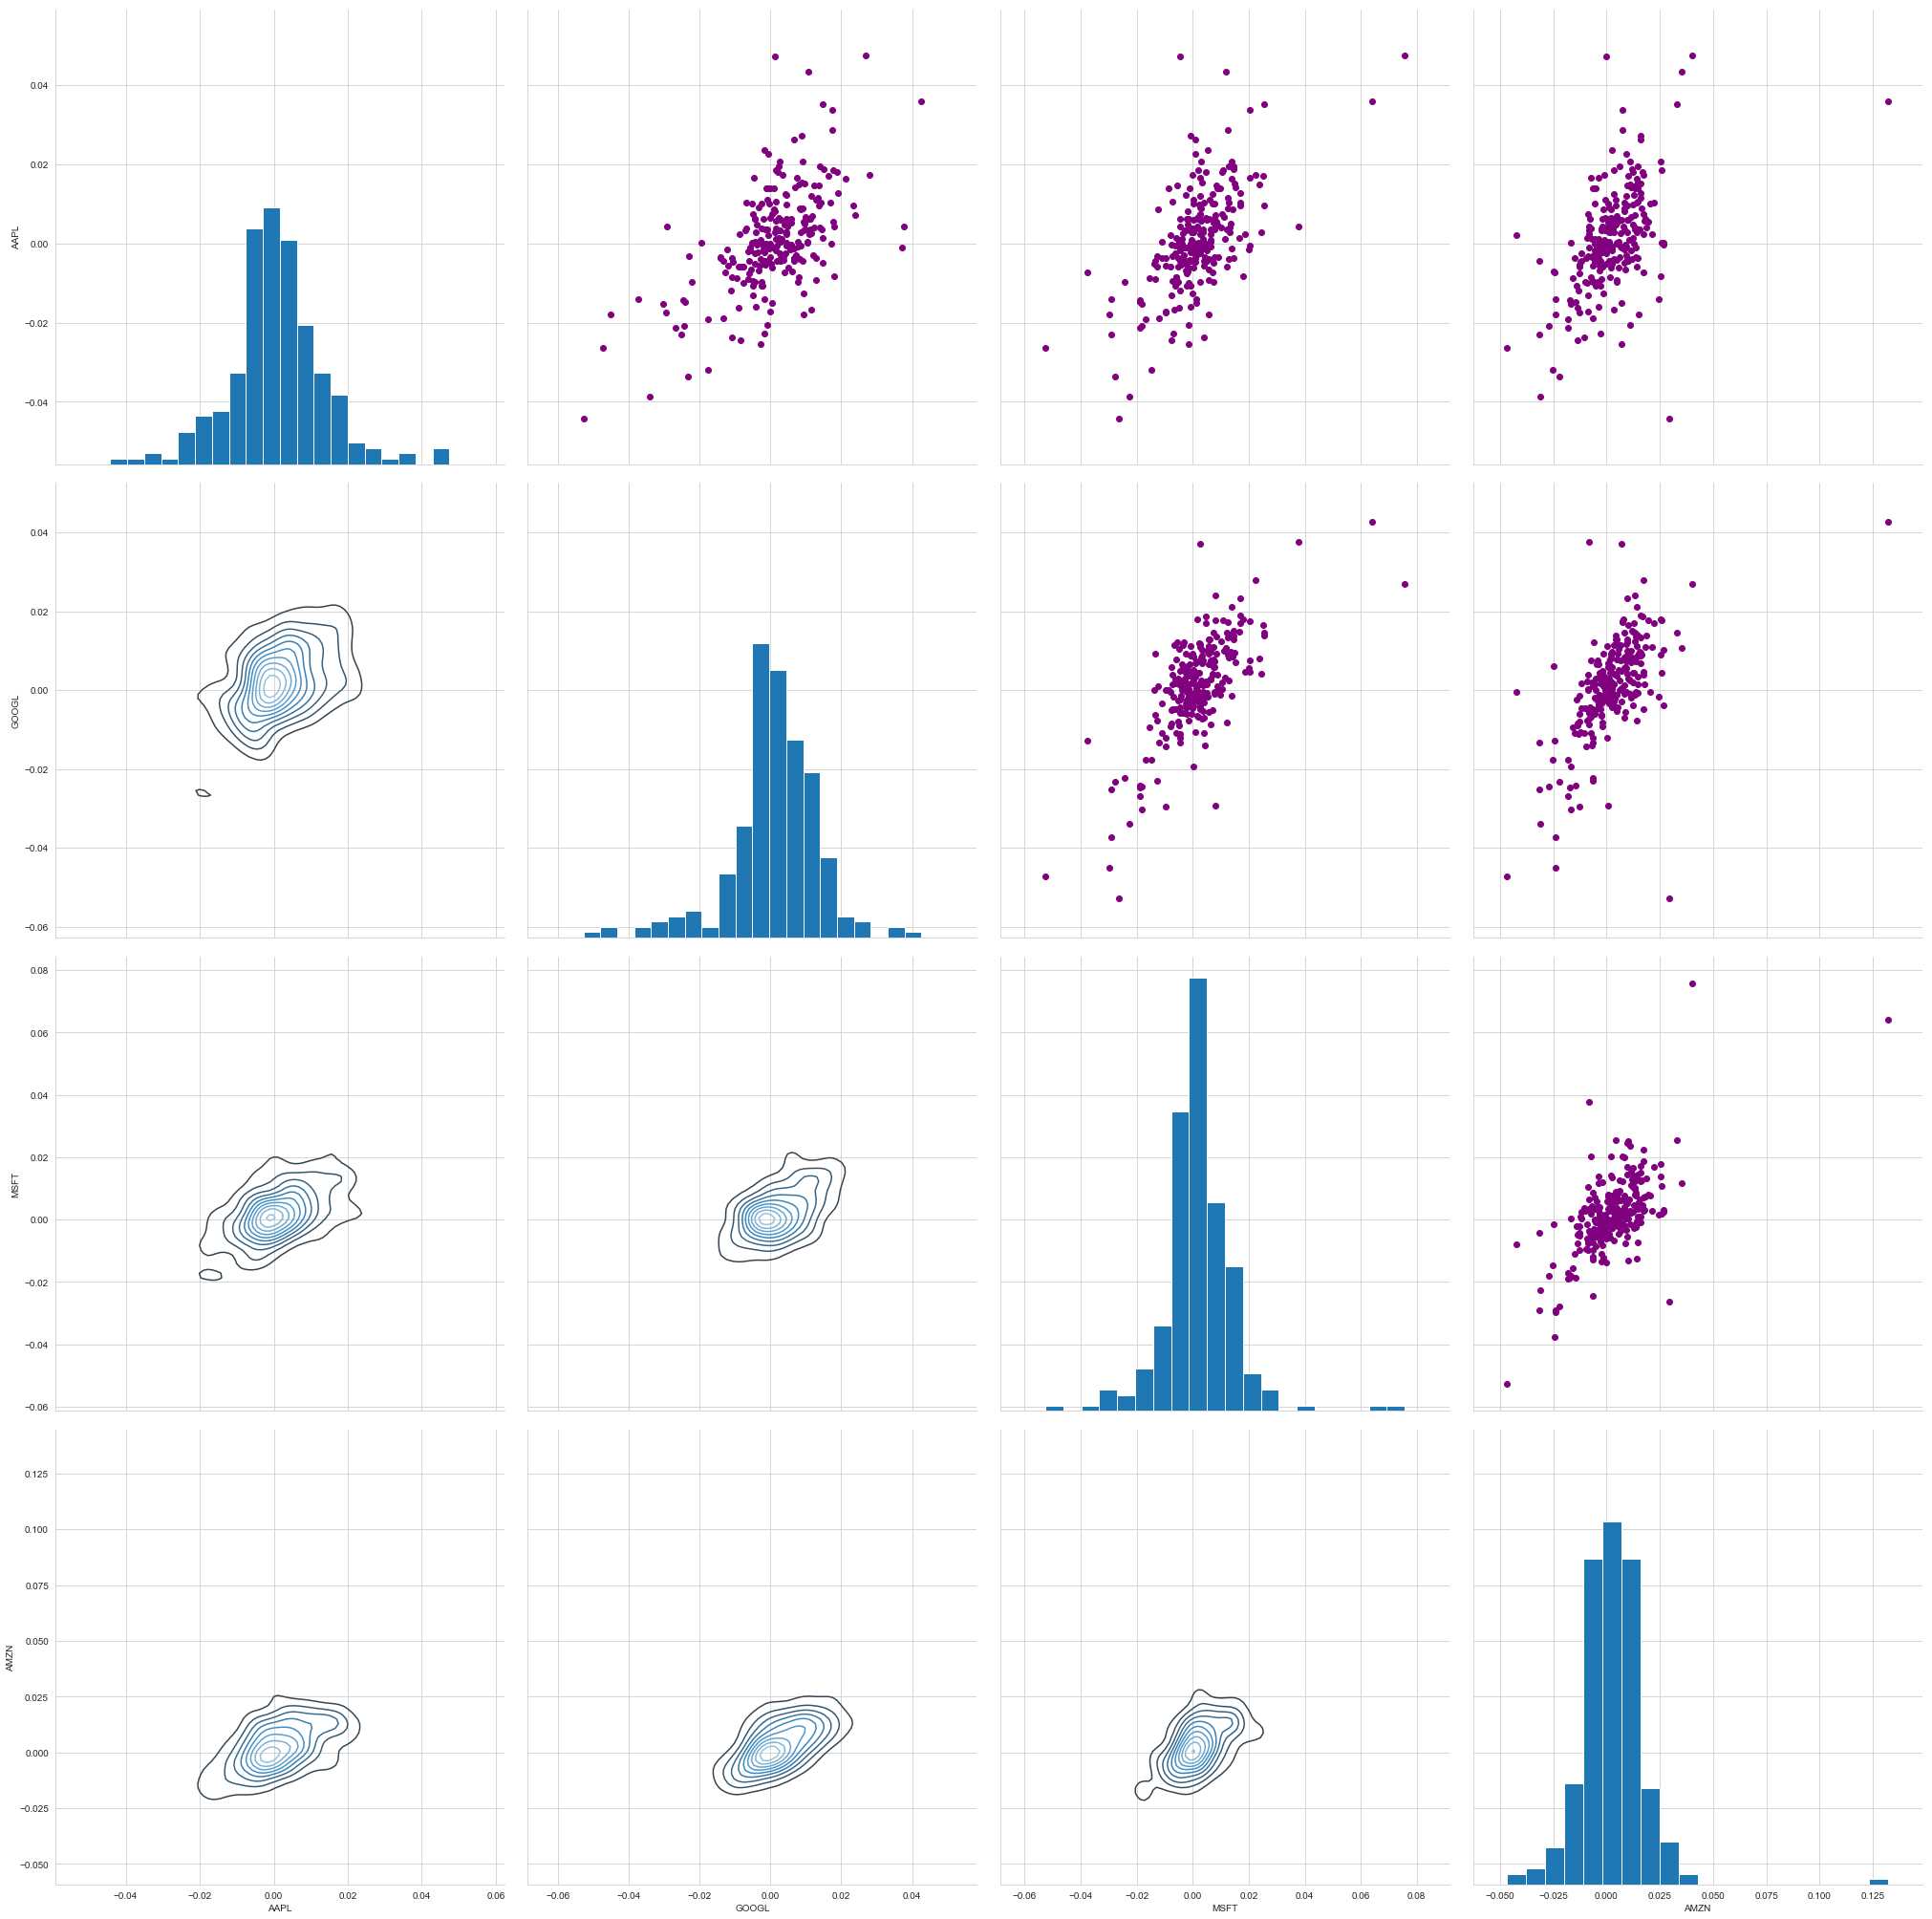

In [16]:
j = sns.PairGrid(tech_rets.dropna(), height=7)
j.map_upper(plt.scatter, color='purple')
j.map_lower(sns.kdeplot, cmap='Blues_d')
j.map_diag(plt.hist, bins=20)

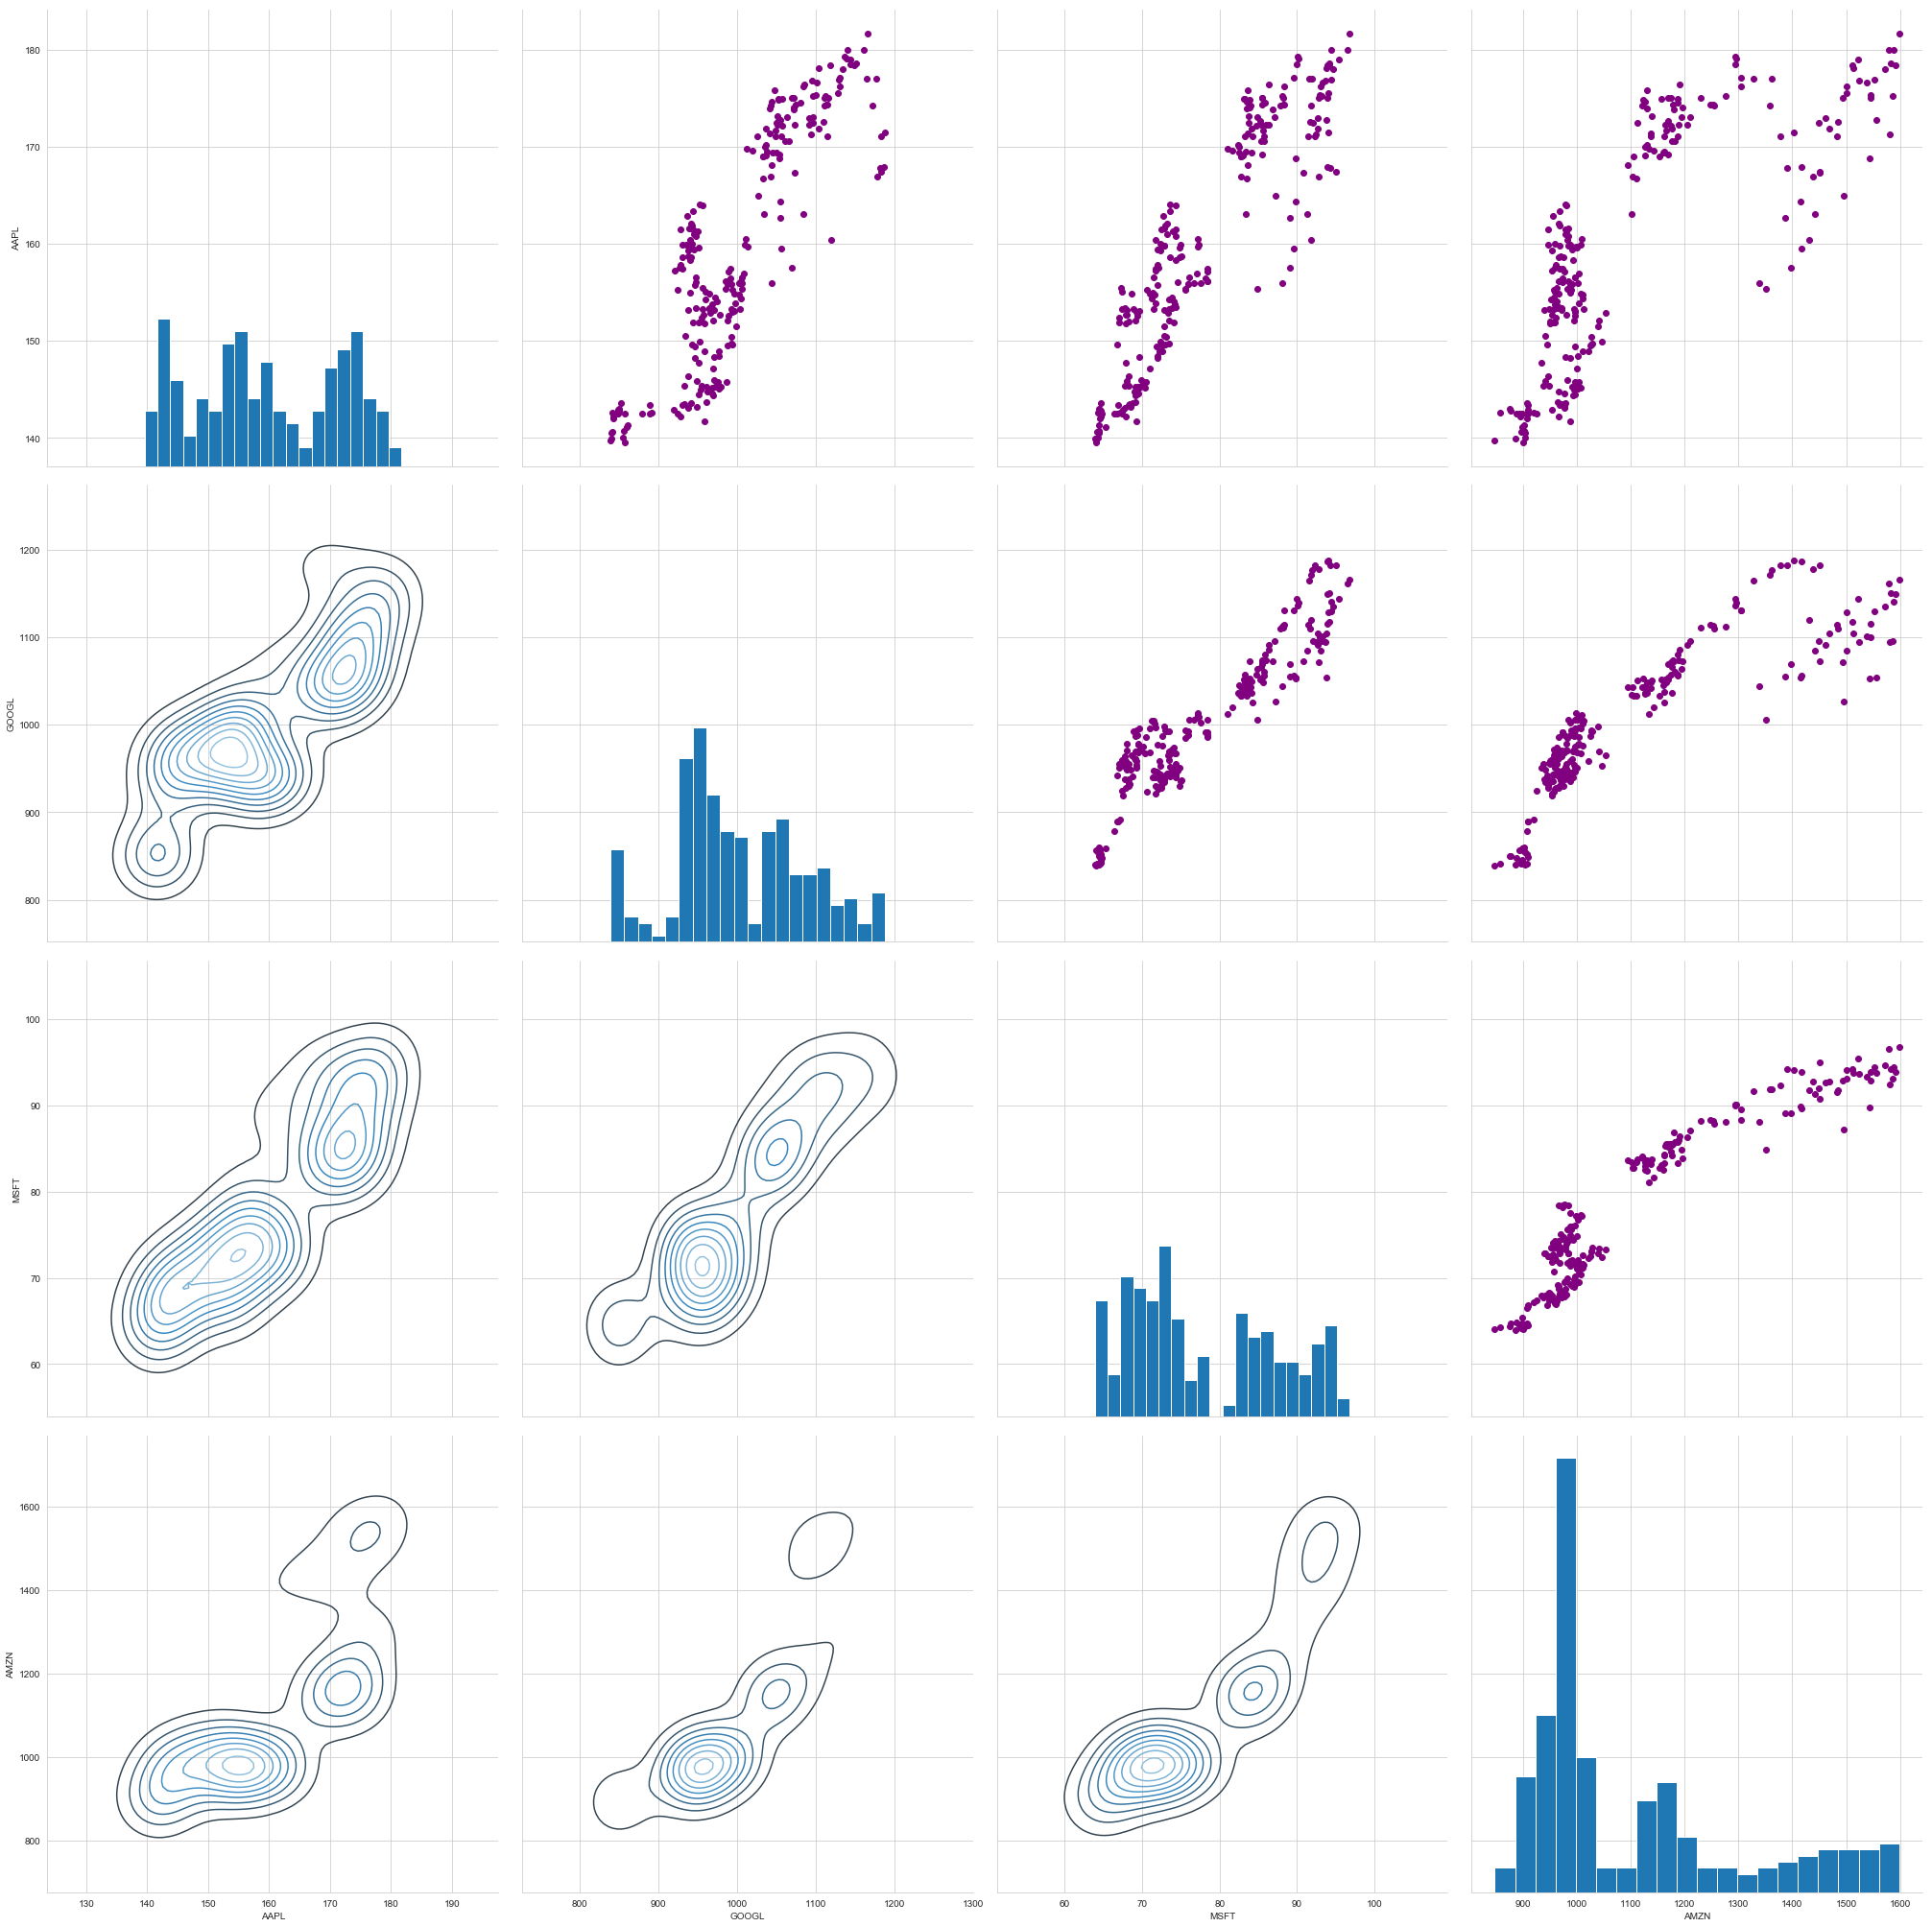

In [17]:
# Closing price 
j = sns.PairGrid(closing_df.dropna(), height=7)
j.map_upper(plt.scatter, color='purple')
j.map_lower(sns.kdeplot, cmap='Blues_d')
j.map_diag(plt.hist, bins=20)

In [18]:
tech_rets.corr(method='pearson')

,AAPL,GOOGL,MSFT,AMZN
AAPL,1.000000,0.597298,0.623458,0.527430
GOOGL,0.597298,1.000000,0.730133,0.614630
MSFT,0.623458,0.730133,1.000000,0.655797
AMZN,0.527430,0.614630,0.655797,1.000000


In [19]:
closing_df.corr(method='pearson')

,AAPL,GOOGL,MSFT,AMZN
AAPL,1.000000,0.851894,0.902748,0.774746
GOOGL,0.851894,1.000000,0.931716,0.866969
MSFT,0.902748,0.931716,1.000000,0.932631
AMZN,0.774746,0.866969,0.932631,1.000000


<h2> Risk Analysis </h2>

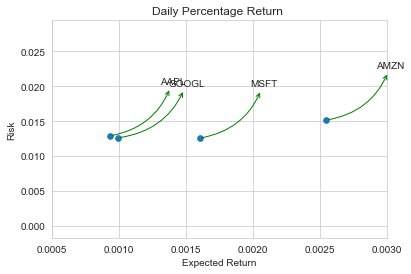

In [20]:
rets = tech_rets.dropna()
plt.scatter(x=rets.mean(), y=rets.std(), s=np.pi*10)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.title('Daily Percentage Return ')
plt.xlim(0.0005, 0.003)
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        arrowprops = dict(arrowstyle = '<-', connectionstyle = 'arc3,rad=-0.3', color='g'))

<h2> Value at Risk: Empirical Quantiles </h2>

In [21]:
rets['GOOGL'].quantile(0.01)

-0.04128124979581911

In [22]:
rets['AAPL'].quantile(0.01)

-0.03282205826997868

In [23]:
rets['AMZN'].quantile(0.01)

-0.03153290351619713

In [24]:
rets['MSFT'].quantile(0.01)

-0.029422783090073235

<h2> Value at Risk: Monte Carlo

In [35]:
days=365
dt=1/days
mu=rets['GOOGL'].mean()
sigma=rets['GOOGL'].std()
GOOGL.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0,0.0,1.0,1050.60,1059.27,1010.58,1054.09,3272409.0
2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,1066.78,1024.87,1026.55,2413517.0
2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,1083.92,1049.64,1053.15,3418154.0
2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,1108.70,1087.21,1094.00,1990515.0
2018-03-20,1098.40,1105.55,1082.42,1095.80,2709310.0,0.0,1.0,1098.40,1105.55,1082.42,1095.80,2709310.0


In [34]:
def monte_carlo (start_price,dt,mu,sigma,days):
    price=np.zeros(days)
    shock=np.zeros(days)
    drift=np.zeros(days)
    price[0]=start_price
    
    for i in range(1,days):
        shock[i] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[i] = mu*dt 
        price[i] = price[i-1] + price[i-1]*(drift[i] + shock[i])
    return price
            

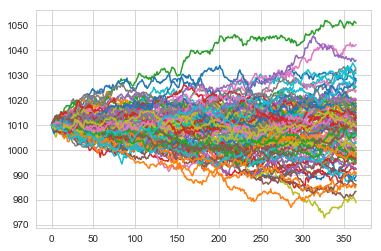

In [39]:
for x in range(100):
    plt.plot(monte_carlo(1010,dt,mu,sigma,days))

In [46]:
runs = 10000
simulation = np.zeros(runs)
for j in range(runs):
    simulation[j] = monte_carlo(1010,dt,mu,sigma,days)[-1]

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  2.,  2.,  3.,  8.,  6.,  5., 11.,
         9., 14., 21., 18., 27., 37., 35., 38., 38., 44., 44., 60., 53.,
        61., 46., 58., 40., 43., 41., 35., 40., 21., 25., 30., 22., 11.,
        15.,  7.,  7.,  7.,  5.,  6.,  2.,  0.,  0.,  0.,  1.]),
 array([ 965.42871058,  967.17507841,  968.92144624,  970.66781407,
         972.41418191,  974.16054974,  975.90691757,  977.6532854 ,
         979.39965324,  981.14602107,  982.8923889 ,  984.63875673,
         986.38512457,  988.1314924 ,  989.87786023,  991.62422807,
         993.3705959 ,  995.11696373,  996.86333156,  998.6096994 ,
        1000.35606723, 1002.10243506, 1003.84880289, 1005.59517073,
        1007.34153856, 1009.08790639, 1010.83427422, 1012.58064206,
        1014.32700989, 1016.07337772, 1017.81974555, 1019.56611339,
        1021.31248122, 1023.05884905, 1024.80521689, 1026.55158472,
        1028.29795255, 1030.04432038, 1031.79068822, 1033.53705605,
        1035.28342388, 1037.02979171

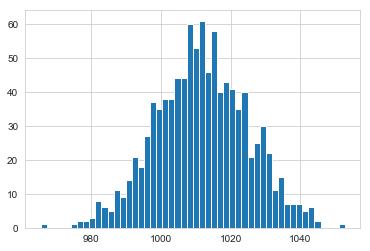

In [44]:
plt.hist(simulation,bins=50)

In [45]:
simulation.mean()

1011.6553234086851